In [226]:
import pandas as pd
import numpy as np
import random

# Setting Random Seed biar kekacauannya konsisten
np.random.seed(42)
random.seed(42)

print("Sedang menarik data mentah dari Server Legacy... ⚠️")

# 1. BUAT DATA DASAR (5000 Baris)
n_rows = 5000

# Fitur A: Jarak (Km) - Tapi nanti kita kotorin
jarak = np.random.uniform(5, 100, n_rows) 

# Fitur B: Cuaca (Kategorikal)
cuaca_options = ['Cerah', 'Hujan', 'Badai', 'Kabut']
cuaca = np.random.choice(cuaca_options, n_rows)

# Fitur C: Tipe Kendaraan
kendaraan = np.random.choice(['Motor', 'Mobil_Box', 'Truk'], n_rows)

# Fitur D: Tingkat Macet (1-10)
macet = np.random.randint(1, 11, n_rows)

# Target: Waktu Pengiriman (Menit) - Rumus Logika Dasar
# Waktu = Jarak * 2 + Macet * 5 + Random Noise
waktu = (jarak * 2) + (macet * 5) + np.random.normal(0, 10, n_rows)
# Tambah delay kalau Hujan/Badai
weather_delay = {'Cerah':0, 'Kabut':5, 'Hujan':15, 'Badai':45}
waktu += [weather_delay[c] for c in cuaca]

# Bikin DataFrame Awal
df = pd.DataFrame({
    'ID_Pengiriman': [f'PKG-{i:05d}' for i in range(n_rows)],
    'Jarak_KM': jarak,
    'Cuaca': cuaca,
    'Tipe_Kendaraan': kendaraan,
    'Tingkat_Macet': macet,
    'Nama_Kurir': [random.choice(['Budi', 'Siti', 'Agus', 'Wawan', 'Dian']) for _ in range(n_rows)], # Fitur Gak Penting
    'Waktu_Tempuh': waktu
})

# -----------------------------------------------------------
# 😈 FASE PENGOTORAN DATA (THE MESSY PART)
# -----------------------------------------------------------

print("Menyuntikkan error sistem & human error... 💉")

# 1. DUPLIKAT: Ada admin yang input data double
df = pd.concat([df, df.sample(200)], ignore_index=True)

# 2. MISSING VALUES (NaN): Sensor GPS mati nyala
# Hilangkan 10% data Jarak
mask_nan_jarak = np.random.choice([True, False], size=len(df), p=[0.1, 0.9])
df.loc[mask_nan_jarak, 'Jarak_KM'] = np.nan

# 3. TYPO / INKONSISTENSI TEXT: Admin ngantuk ngetik Cuaca
# Mengubah "Hujan" jadi "hujan " (spasi), "HUJAN", "Hujann"
typo_indices = df[df['Cuaca'] == 'Hujan'].sample(frac=0.3).index
df.loc[typo_indices, 'Cuaca'] = np.random.choice(['hujan', 'HUJAN', 'Hujan '], size=len(typo_indices))

# 4. DATA TYPE SALAH: Kolom angka jadi string
# Tingkat macet kecampur huruf "Level "
df['Tingkat_Macet'] = df['Tingkat_Macet'].astype(str) # Jadi string
messy_macet_idx = df.sample(100).index
df.loc[messy_macet_idx, 'Tingkat_Macet'] = "Level " + df.loc[messy_macet_idx, 'Tingkat_Macet']

# 5. OUTLIER TIDAK MASUK AKAL
# Waktu tempuh negatif (Mustahil) & Waktu tempuh 10.000 menit (Gak masuk akal)
df.loc[df.sample(20).index, 'Waktu_Tempuh'] = -100
df.loc[df.sample(10).index, 'Waktu_Tempuh'] = 10000

# 6. KOLOM SAMPAH
# Tambah kolom yang isinya cuma 1 nilai doang (Gak guna buat ML)
df['Negara'] = 'Indonesia' 

# Acak urutan baris biar pusing
df = df.sample(frac=1).reset_index(drop=True)

print("✅ Selesai! Data mentah siap dibersihkan.")
print(f"Total Baris: {df.shape[0]}")
df.head(10)

Sedang menarik data mentah dari Server Legacy... ⚠️
Menyuntikkan error sistem & human error... 💉
✅ Selesai! Data mentah siap dibersihkan.
Total Baris: 5200


,ID_Pengiriman,Jarak_KM,Cuaca,Tipe_Kendaraan,Tingkat_Macet,Nama_Kurir,Waktu_Tempuh,Negara
0,PKG-01240,NaN,Cerah,Mobil_Box,8,Siti,214.710635,Indonesia
1,PKG-02891,70.893715,Hujan,Motor,1,Dian,164.655713,Indonesia
2,PKG-02395,37.858359,Kabut,Motor,7,Wawan,113.356342,Indonesia
3,PKG-02864,NaN,Kabut,Mobil_Box,2,Wawan,110.470556,Indonesia
4,PKG-04928,75.670993,Kabut,Mobil_Box,6,Agus,181.566538,Indonesia
5,PKG-02040,85.808525,Kabut,Truk,8,Agus,206.221804,Indonesia
6,PKG-01466,97.831548,Hujan,Mobil_Box,3,Dian,215.251044,Indonesia
7,PKG-00125,45.575240,Cerah,Motor,1,Dian,105.399627,Indonesia
8,PKG-04070,35.811291,Kabut,Motor,8,Budi,117.364487,Indonesia
9,PKG-01183,93.542670,Cerah,Truk,8,Wawan,214.791765,Indonesia


In [227]:
df

,ID_Pengiriman,Jarak_KM,Cuaca,Tipe_Kendaraan,Tingkat_Macet,Nama_Kurir,Waktu_Tempuh,Negara
0,PKG-01240,NaN,Cerah,Mobil_Box,8,Siti,214.710635,Indonesia
1,PKG-02891,70.893715,Hujan,Motor,1,Dian,164.655713,Indonesia
2,PKG-02395,37.858359,Kabut,Motor,7,Wawan,113.356342,Indonesia
3,PKG-02864,NaN,Kabut,Mobil_Box,2,Wawan,110.470556,Indonesia
4,PKG-04928,75.670993,Kabut,Mobil_Box,6,Agus,181.566538,Indonesia
...,...,...,...,...,...,...,...,...
5195,PKG-02210,76.626381,Cerah,Truk,8,Agus,195.035861,Indonesia
5196,PKG-04509,NaN,Badai,Truk,2,Dian,243.608753,Indonesia
5197,PKG-02329,9.857861,Kabut,Truk,4,Agus,33.545919,Indonesia
5198,PKG-00644,NaN,Kabut,Truk,4,Budi,66.415016,Indonesia


In [228]:
df.isnull().sum()
tes = df.copy()
tes

,ID_Pengiriman,Jarak_KM,Cuaca,Tipe_Kendaraan,Tingkat_Macet,Nama_Kurir,Waktu_Tempuh,Negara
0,PKG-01240,NaN,Cerah,Mobil_Box,8,Siti,214.710635,Indonesia
1,PKG-02891,70.893715,Hujan,Motor,1,Dian,164.655713,Indonesia
2,PKG-02395,37.858359,Kabut,Motor,7,Wawan,113.356342,Indonesia
3,PKG-02864,NaN,Kabut,Mobil_Box,2,Wawan,110.470556,Indonesia
4,PKG-04928,75.670993,Kabut,Mobil_Box,6,Agus,181.566538,Indonesia
...,...,...,...,...,...,...,...,...
5195,PKG-02210,76.626381,Cerah,Truk,8,Agus,195.035861,Indonesia
5196,PKG-04509,NaN,Badai,Truk,2,Dian,243.608753,Indonesia
5197,PKG-02329,9.857861,Kabut,Truk,4,Agus,33.545919,Indonesia
5198,PKG-00644,NaN,Kabut,Truk,4,Budi,66.415016,Indonesia


In [229]:

tes['Jarak_KM'] = tes['Jarak_KM'].fillna(tes['Jarak_KM'].median())
df = tes.copy()

In [230]:
df

,ID_Pengiriman,Jarak_KM,Cuaca,Tipe_Kendaraan,Tingkat_Macet,Nama_Kurir,Waktu_Tempuh,Negara
0,PKG-01240,53.018236,Cerah,Mobil_Box,8,Siti,214.710635,Indonesia
1,PKG-02891,70.893715,Hujan,Motor,1,Dian,164.655713,Indonesia
2,PKG-02395,37.858359,Kabut,Motor,7,Wawan,113.356342,Indonesia
3,PKG-02864,53.018236,Kabut,Mobil_Box,2,Wawan,110.470556,Indonesia
4,PKG-04928,75.670993,Kabut,Mobil_Box,6,Agus,181.566538,Indonesia
...,...,...,...,...,...,...,...,...
5195,PKG-02210,76.626381,Cerah,Truk,8,Agus,195.035861,Indonesia
5196,PKG-04509,53.018236,Badai,Truk,2,Dian,243.608753,Indonesia
5197,PKG-02329,9.857861,Kabut,Truk,4,Agus,33.545919,Indonesia
5198,PKG-00644,53.018236,Kabut,Truk,4,Budi,66.415016,Indonesia


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_Pengiriman   5200 non-null   object 
 1   Jarak_KM        5200 non-null   float64
 2   Cuaca           5200 non-null   object 
 3   Tipe_Kendaraan  5200 non-null   object 
 4   Tingkat_Macet   5200 non-null   object 
 5   Nama_Kurir      5200 non-null   object 
 6   Waktu_Tempuh    5200 non-null   float64
 7   Negara          5200 non-null   object 
dtypes: float64(2), object(6)
memory usage: 325.1+ KB


In [232]:
df.describe()

,Jarak_KM,Waktu_Tempuh
count,5200.000000,5200.000000
mean,52.532813,166.144609
std,26.095595,436.046968
min,5.001105,-100.000000
25%,31.049149,100.861231
50%,53.018236,147.724615
75%,73.725470,195.499313
max,99.973179,10000.000000


In [233]:
df.duplicated().sum()
df = df.drop_duplicates()
df.duplicated().sum()

0

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5053 entries, 0 to 5199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_Pengiriman   5053 non-null   object 
 1   Jarak_KM        5053 non-null   float64
 2   Cuaca           5053 non-null   object 
 3   Tipe_Kendaraan  5053 non-null   object 
 4   Tingkat_Macet   5053 non-null   object 
 5   Nama_Kurir      5053 non-null   object 
 6   Waktu_Tempuh    5053 non-null   float64
 7   Negara          5053 non-null   object 
dtypes: float64(2), object(6)
memory usage: 355.3+ KB


In [235]:
df.describe()

,Jarak_KM,Waktu_Tempuh
count,5053.000000,5053.000000
mean,52.497084,166.582989
std,26.048601,442.213317
min,5.001105,-100.000000
25%,31.106573,100.824858
50%,53.018236,147.426842
75%,73.403471,195.480283
max,99.973179,10000.000000


In [236]:
df = df[df['Waktu_Tempuh'] > 0 ]
df

,ID_Pengiriman,Jarak_KM,Cuaca,Tipe_Kendaraan,Tingkat_Macet,Nama_Kurir,Waktu_Tempuh,Negara
0,PKG-01240,53.018236,Cerah,Mobil_Box,8,Siti,214.710635,Indonesia
1,PKG-02891,70.893715,Hujan,Motor,1,Dian,164.655713,Indonesia
2,PKG-02395,37.858359,Kabut,Motor,7,Wawan,113.356342,Indonesia
3,PKG-02864,53.018236,Kabut,Mobil_Box,2,Wawan,110.470556,Indonesia
4,PKG-04928,75.670993,Kabut,Mobil_Box,6,Agus,181.566538,Indonesia
...,...,...,...,...,...,...,...,...
5195,PKG-02210,76.626381,Cerah,Truk,8,Agus,195.035861,Indonesia
5196,PKG-04509,53.018236,Badai,Truk,2,Dian,243.608753,Indonesia
5197,PKG-02329,9.857861,Kabut,Truk,4,Agus,33.545919,Indonesia
5198,PKG-00644,53.018236,Kabut,Truk,4,Budi,66.415016,Indonesia


In [237]:
numeric = df.select_dtypes('number').columns
numeric

Index(['Jarak_KM', 'Waktu_Tempuh'], dtype='object')

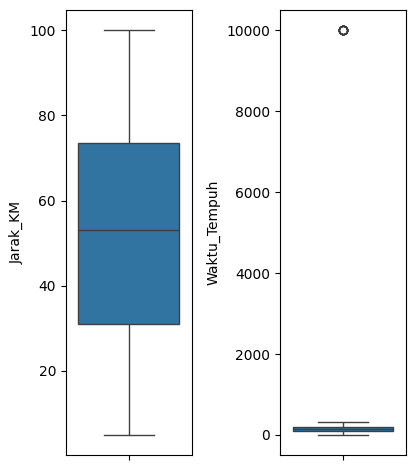

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt
for i, colum in enumerate(numeric):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(df[colum])
plt.tight_layout()
plt.show()

In [239]:
q1 = df[numeric].quantile(0.25)
q3 = df[numeric].quantile(0.75)

iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr 

condition = ~((df[numeric] < lower) | (df[numeric] > q3)).any(axis=1)
df_numeric = df.loc[condition, numeric]
df_numeric

,Jarak_KM,Waktu_Tempuh
1,70.893715,164.655713
2,37.858359,113.356342
3,53.018236,110.470556
7,45.575240,105.399627
8,35.811291,117.364487
...,...,...
5190,53.018236,93.351538
5191,53.705409,151.510721
5197,9.857861,33.545919
5198,53.018236,66.415016


In [254]:
df_numeric_feature = df_numeric.drop(columns='Waktu_Tempuh')
df_numeric_feature

,Jarak_KM
1,70.893715
2,37.858359
3,53.018236
7,45.575240
8,35.811291
...,...
5190,53.018236
5191,53.705409
5197,9.857861
5198,53.018236


In [270]:
target = df_numeric.drop(columns= 'Jarak_KM')

In [212]:
categorical = df_copy.select_dtypes('object').columns

categorical

Index(['Cuaca', 'Tipe_Kendaraan', 'Tingkat_Macet', 'Negara'], dtype='object')

In [211]:
# df_copy = df_copy.drop(columns='ID_Pengiriman')
df_copy

,Jarak_KM,Cuaca,Tipe_Kendaraan,Tingkat_Macet,Waktu_Tempuh,Negara
0,53.023332,Cerah,Mobil_Box,8,214.710635,Indonesia
1,70.893715,Hujan,Motor,1,164.655713,Indonesia
2,37.858359,Kabut,Motor,7,113.356342,Indonesia
3,53.023332,Kabut,Mobil_Box,2,110.470556,Indonesia
4,75.670993,Kabut,Mobil_Box,6,181.566538,Indonesia
...,...,...,...,...,...,...
5195,76.626381,Cerah,Truk,8,195.035861,Indonesia
5196,53.023332,Badai,Truk,2,243.608753,Indonesia
5197,9.857861,Kabut,Truk,4,33.545919,Indonesia
5198,53.023332,Kabut,Truk,4,66.415016,Indonesia


In [189]:
df_copy['Cuaca'] = df_copy['Cuaca'].str.strip().str.title()
df_copy = df_copy.drop(columns='Nama_Kurir')
# df_copy = df.copy()

In [261]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_numeric_feature['Jarak_KM'] = scaler.fit_transform(df_numeric_feature[['Jarak_KM']])
df_numeric_feature

,Jarak_KM
1,1.671324
2,-0.077676
3,0.724937
7,0.330881
8,-0.186055
...,...
5190,0.724937
5191,0.761319
5197,-1.560115
5198,0.724937


In [214]:
df_one_hot = pd.get_dummies(df_copy[categorical], columns=categorical)
df_one_hot


,Cuaca_Badai,Cuaca_Cerah,Cuaca_Hujan,Cuaca_Kabut,Tipe_Kendaraan_Mobil_Box,Tipe_Kendaraan_Motor,Tipe_Kendaraan_Truk,Tingkat_Macet_1,Tingkat_Macet_10,Tingkat_Macet_2,...,Tingkat_Macet_Level 10,Tingkat_Macet_Level 2,Tingkat_Macet_Level 3,Tingkat_Macet_Level 4,Tingkat_Macet_Level 5,Tingkat_Macet_Level 6,Tingkat_Macet_Level 7,Tingkat_Macet_Level 8,Tingkat_Macet_Level 9,Negara_Indonesia
0,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,True,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5196,True,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
5197,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5198,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [271]:
df = pd.concat([df_numeric_feature, df_one_hot,target ], axis=1, join='inner')
df = df.drop(columns='Negara_Indonesia')

In [272]:
df

,Jarak_KM,Cuaca_Badai,Cuaca_Cerah,Cuaca_Hujan,Cuaca_Kabut,Tipe_Kendaraan_Mobil_Box,Tipe_Kendaraan_Motor,Tipe_Kendaraan_Truk,Tingkat_Macet_1,Tingkat_Macet_10,...,Tingkat_Macet_Level 10,Tingkat_Macet_Level 2,Tingkat_Macet_Level 3,Tingkat_Macet_Level 4,Tingkat_Macet_Level 5,Tingkat_Macet_Level 6,Tingkat_Macet_Level 7,Tingkat_Macet_Level 8,Tingkat_Macet_Level 9,Waktu_Tempuh
1,1.671324,False,False,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,164.655713
2,-0.077676,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,113.356342
3,0.724937,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,110.470556
7,0.330881,False,True,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,105.399627
8,-0.186055,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,117.364487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5190,0.724937,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,93.351538
5191,0.761319,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,151.510721
5197,-1.560115,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,33.545919
5198,0.724937,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,66.415016


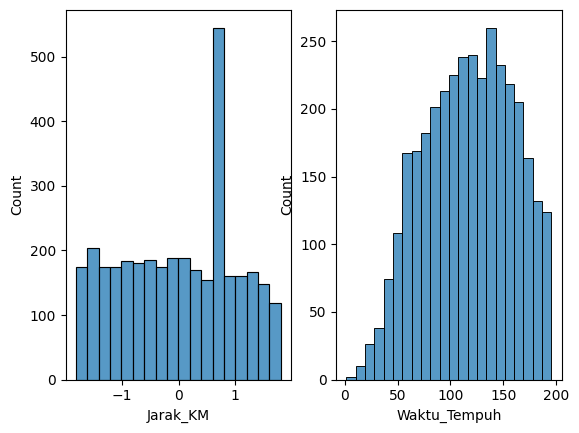

In [275]:
for i, colum in enumerate(df[numeric]):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[colum])

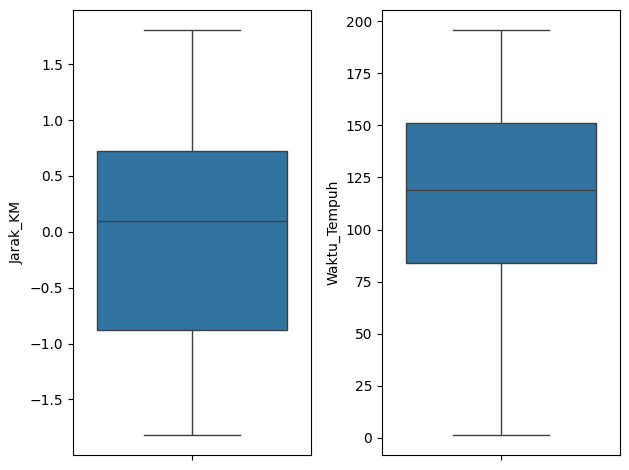

In [276]:
for i, colum in enumerate(df[numeric]):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(df[colum])
plt.tight_layout()

<Axes: >

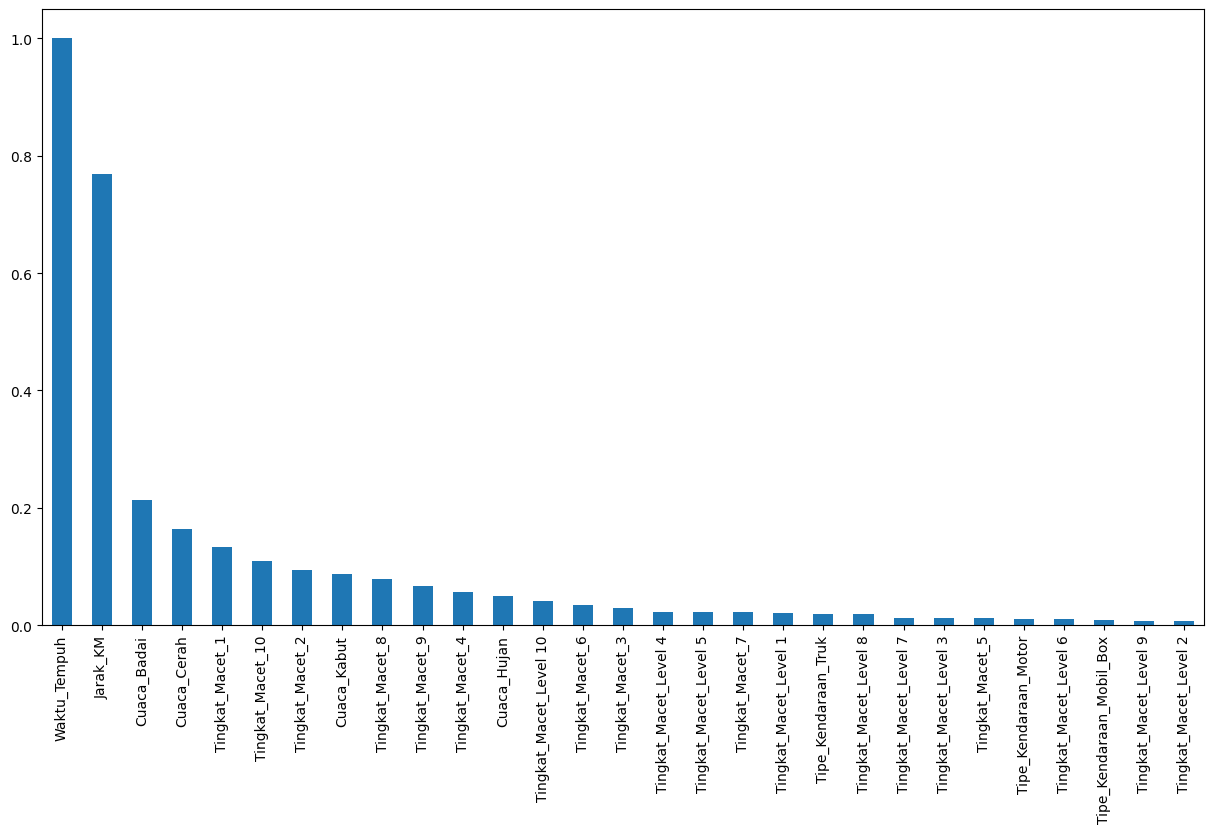

In [289]:
target_corr = df.corr()['Waktu_Tempuh']
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
target_corr_sorted.plot(kind='bar')

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(columns='Waktu_Tempuh')
y = df['Waktu_Tempuh']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)



691

In [309]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

lr_model = LinearRegression().fit(x_train, y_train)
gbr_model = GradientBoostingRegressor().fit(x_train, y_train)

y_pred_lr = lr_model.predict(x_test)
y_pred_gbr = gbr_model.predict(x_test)

print(f'Linear Regression MAE : {mean_absolute_error(y_test, y_pred_lr):.2f} R2_Score : {r2_score(y_test, y_pred_lr):.2f}')
print(f'Gradient Boosting Regressor MAE:{mean_absolute_error(y_test, y_pred_gbr):.2f} R2_score {r2_score(y_test, y_pred_gbr):.2f}')


Linear Regression MAE : 12.52 R2_Score : 0.79
Gradient Boosting Regressor MAE:12.54 R2_score 0.81
